In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_kendall_tau_heatmaps_with_difference(df1, df2, title1=' Heatmap (Full Range)', 
                                              title2=' Heatmap (Mid Range)', 
                                              diff_title='Difference (Full - Mid Range)',metric = 'KendallTau',model_order = ['MLP', 'XGB', 'RF', 'RF_SHORT', 'RIDGE'],descriptor_order = ['mfp3', 'RDKit_PhysChem', 'mfp0'],filename=None):
    """
    Plot two heatmaps for Kendall Tau values with confidence intervals side-by-side, 
    and a third heatmap showing the differences between the two.

    Parameters:
    df1 (pd.DataFrame): DataFrame for the first heatmap with columns ['Model', 'Descriptor', 'Metric', 'Mean', 'CI_Low', 'CI_High']
    df2 (pd.DataFrame): DataFrame for the second heatmap with columns ['Model', 'Descriptor', 'Metric', 'Mean', 'CI_Low', 'CI_High']
    title1 (str): Title of the first heatmap
    title2 (str): Title of the second heatmap
    diff_title (str): Title of the difference heatmap
    """
    # Define model and descriptor orders for sorting
    title1 = metric + title1
    title2 = metric + title2
    df1 = df1[df1['Metric'] == metric]
    df2 = df2[df2['Metric'] == metric]

    # Filter for Kendall Tau metric and prepare DataFrames
    for df in [df1, df2]:
        df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
        df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)
    
    df1 = df1[df1['Metric'] == metric].sort_values(['Descriptor', 'Model'])
    df2 = df2[df2['Metric'] == metric].sort_values(['Descriptor', 'Model'])

    heatmap_data1 = df1.pivot(index='Descriptor', columns='Model', values='Mean')
    heatmap_data2 = df2.pivot(index='Descriptor', columns='Model', values='Mean')

    # Calculate the difference between the two heatmaps
    heatmap_diff = heatmap_data1 - heatmap_data2

    # Get the maximum absolute difference for symmetric color scaling
    max_diff = np.max(np.abs(heatmap_diff.values))

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(36, 10))

    # Plot first heatmap
    sns.heatmap(heatmap_data1, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True, ax=axes[0])
    axes[0].set_title(title1, fontsize=14)
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Descriptor')
    axes[0].tick_params(axis='x', rotation=45, labelsize=14)
    axes[0].tick_params(axis='y', rotation=45, labelsize=14)

    # Add text annotations for mean and CI to the first heatmap
    for i in range(heatmap_data1.shape[0]):
        for j in range(heatmap_data1.shape[1]):
            mean_val = heatmap_data1.iloc[i, j]
            if not pd.isnull(mean_val):
                ci_low = df1[
                    (df1['Descriptor'] == heatmap_data1.index[i]) &
                    (df1['Model'] == heatmap_data1.columns[j])
                ]['CI_Low'].values[0]
                ci_high = df1[
                    (df1['Descriptor'] == heatmap_data1.index[i]) &
                    (df1['Model'] == heatmap_data1.columns[j])
                ]['CI_High'].values[0]
                annotation_text = f"{mean_val:.2f}\n({ci_low:.2f}-{ci_high:.2f})"
                axes[0].text(j + 0.5, i + 0.5, annotation_text, ha='center', va='center', color='black', fontsize=14)

    # Plot second heatmap
    sns.heatmap(heatmap_data2, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True, ax=axes[1])
    axes[1].set_title(title2, fontsize=14)
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Descriptor')
    axes[1].tick_params(axis='x', rotation=45, labelsize=14)
    axes[1].tick_params(axis='y', rotation=45, labelsize=14)

    # Add text annotations for mean and CI to the second heatmap
    for i in range(heatmap_data2.shape[0]):
        for j in range(heatmap_data2.shape[1]):
            mean_val = heatmap_data2.iloc[i, j]
            if not pd.isnull(mean_val):
                ci_low = df2[
                    (df2['Descriptor'] == heatmap_data2.index[i]) &
                    (df2['Model'] == heatmap_data2.columns[j])
                ]['CI_Low'].values[0]
                ci_high = df2[
                    (df2['Descriptor'] == heatmap_data2.index[i]) &
                    (df2['Model'] == heatmap_data2.columns[j])
                ]['CI_High'].values[0]
                annotation_text = f"{mean_val:.2f}\n({ci_low:.2f}-{ci_high:.2f})"
                axes[1].text(j + 0.5, i + 0.5, annotation_text, ha='center', va='center', color='black', fontsize=14)

    # Plot difference heatmap with centered color scale at 0
    sns.heatmap(heatmap_diff, annot=True, cmap='coolwarm', vmin=-max_diff, vmax=max_diff, center=0,
                fmt=".2f", linewidths=0.5, cbar=True, ax=axes[2], annot_kws={"fontsize": 14})
    axes[2].set_title(diff_title, fontsize=14)
    axes[2].set_xlabel('Model')
    axes[2].set_ylabel('Descriptor')
    axes[2].tick_params(axis='x', rotation=45, labelsize=14)
    axes[2].tick_params(axis='y', rotation=45, labelsize=14)

    plt.tight_layout()
    if filename:
        plt.savefig(filename + '.png', dpi = 800)
    plt.show()

In [11]:
from utils.visualization import compile_metrics_dataframe
data_path = 'results/test_set_results_physchem.pkl'
df_metrics_full_train_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='full_range')
df_metrics_full_mid_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='mid_range')

KeyError: 'combined_titles'

/tmp/ipykernel_897279/997277503.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_897279/997277503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


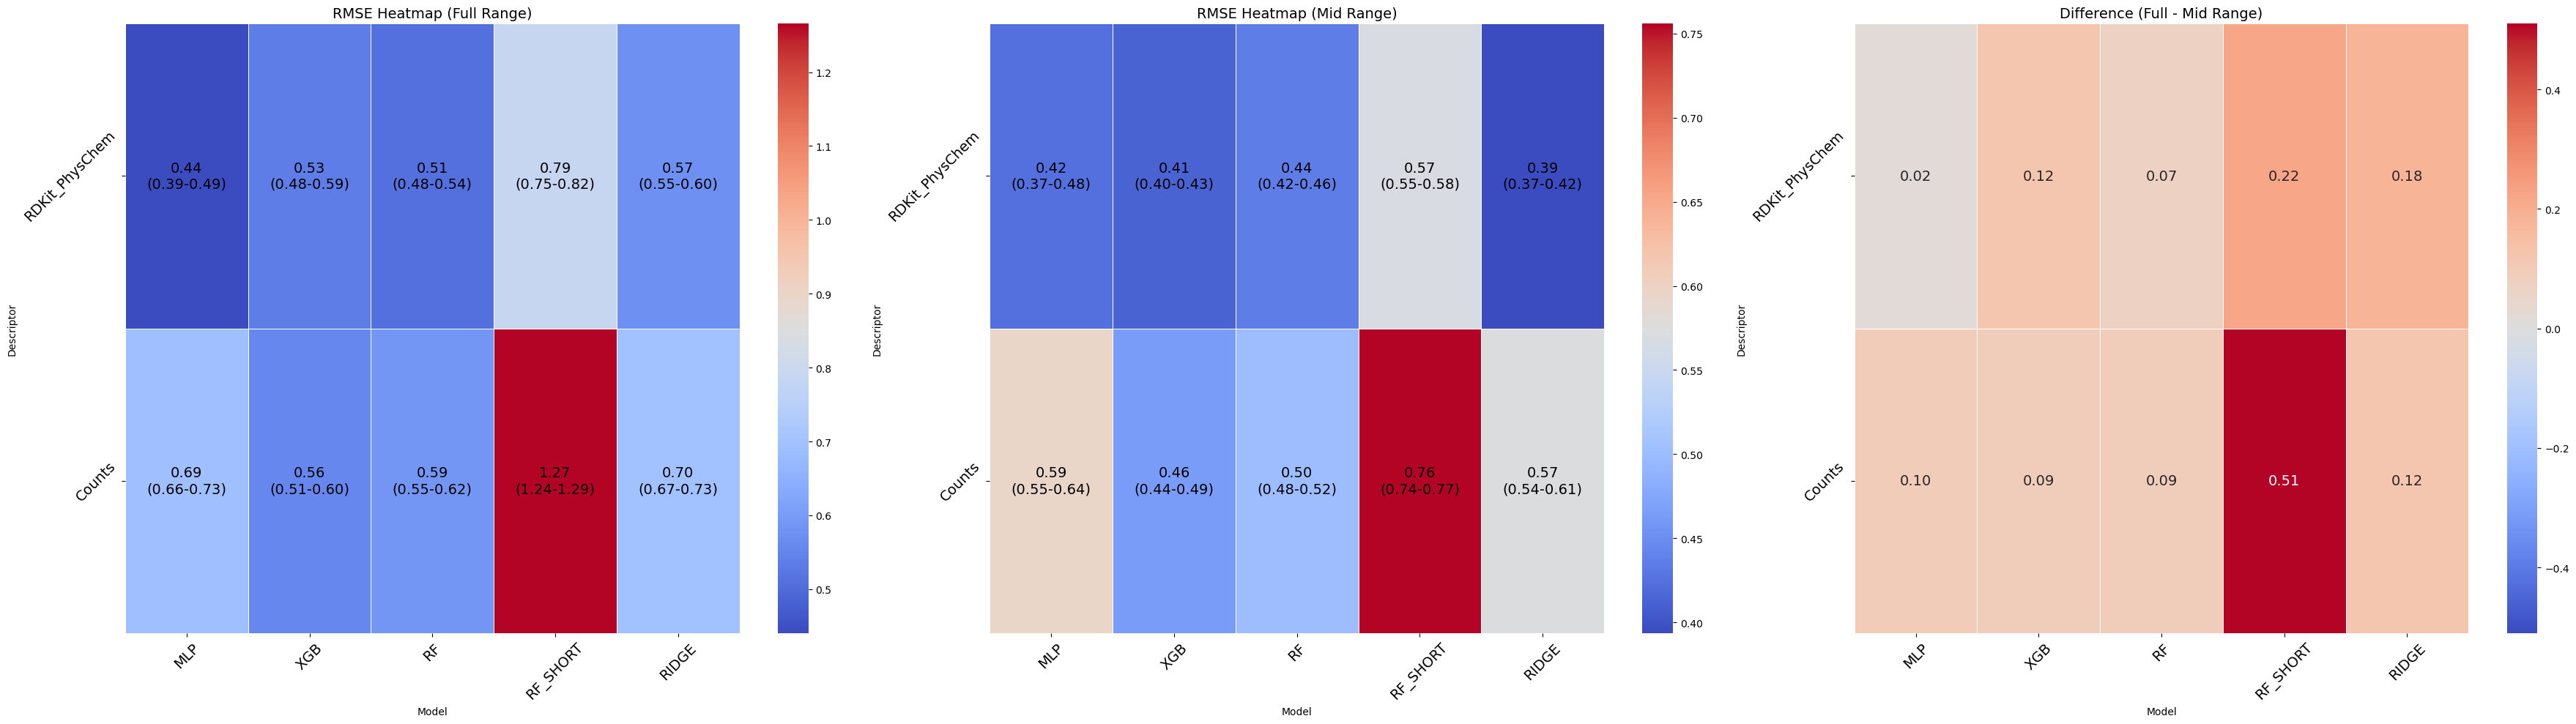

In [3]:
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='RMSE',descriptor_order=['RDKit_PhysChem', 'Counts'],filename='test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle_RMSE')

/tmp/ipykernel_897279/997277503.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_897279/997277503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


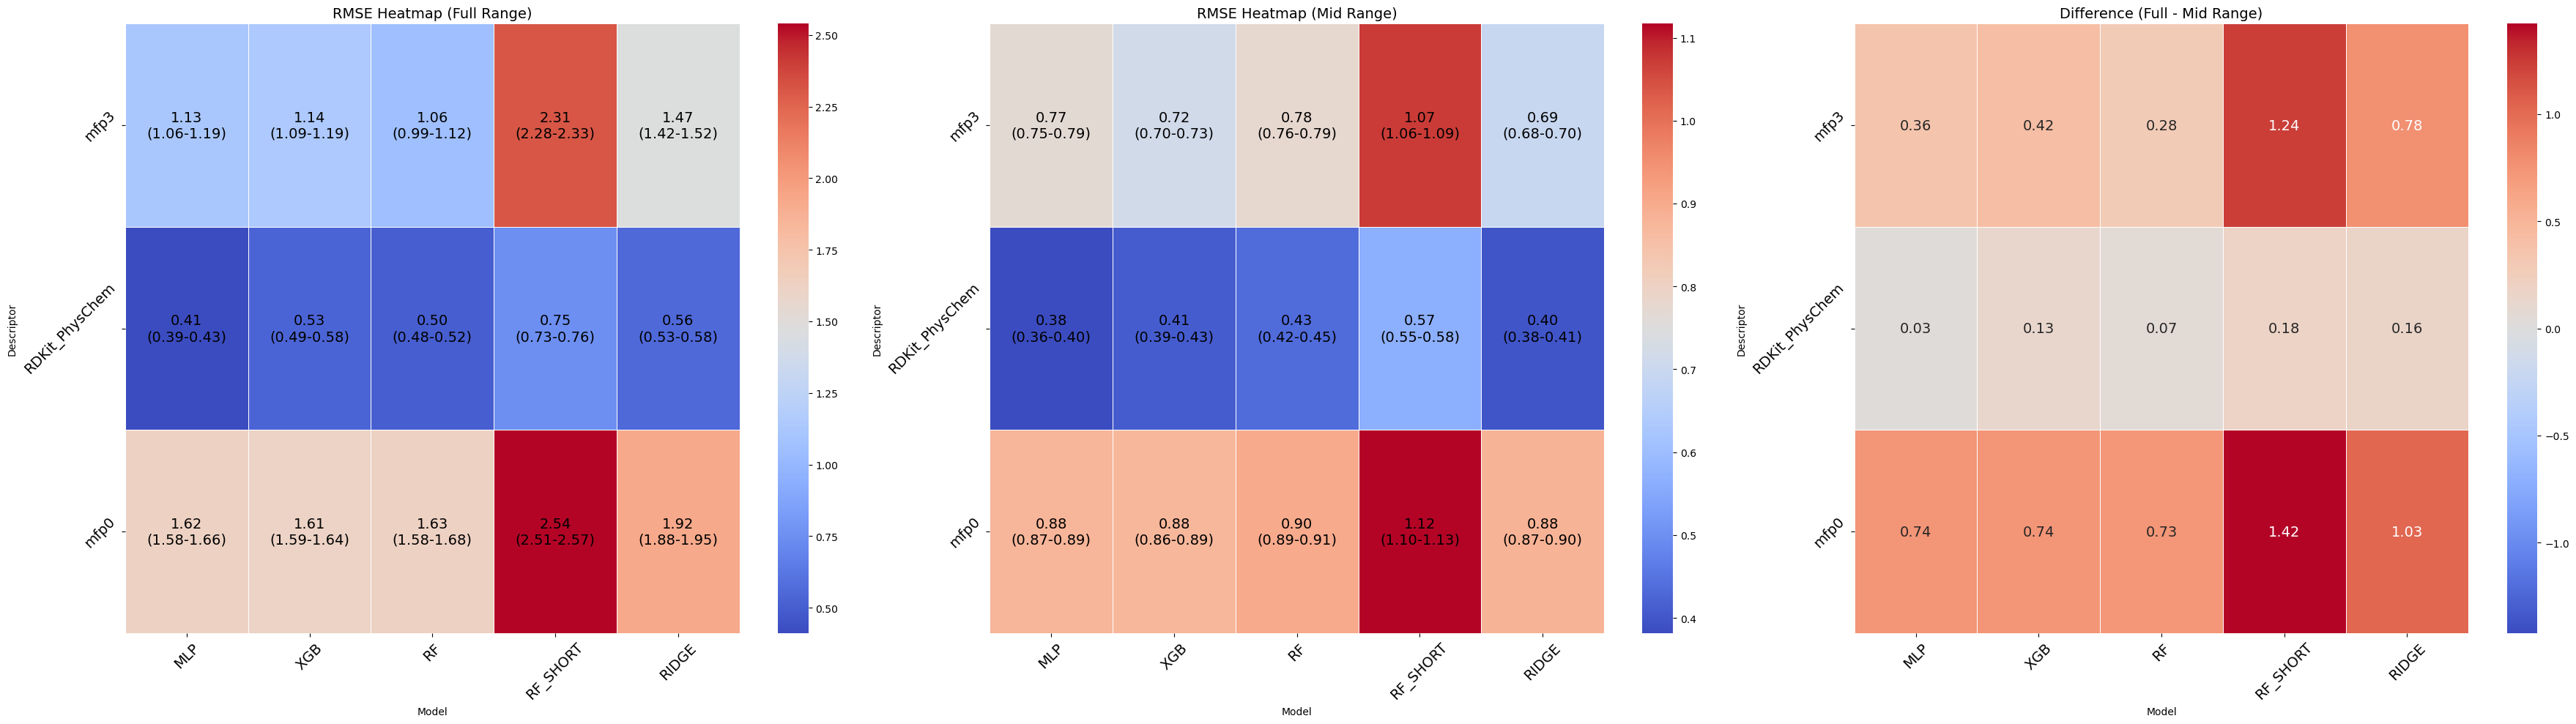

In [4]:
from utils.visualization import compile_metrics_dataframe
data_path = 'results/overfitting_check_different_train_ranges.pkl'
df_metrics_full_train_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='full_range')
df_metrics_full_mid_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='mid_range')
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='RMSE',descriptor_order=['mfp3','RDKit_PhysChem', 'mfp0'],filename='test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle_RMSE')
from utils.visualization import compile_metrics_dataframe
data_path = 'results/test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
df_metrics_full_train_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='full_range')
df_metrics_full_mid_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='mid_range')

/tmp/ipykernel_897279/997277503.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_897279/997277503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


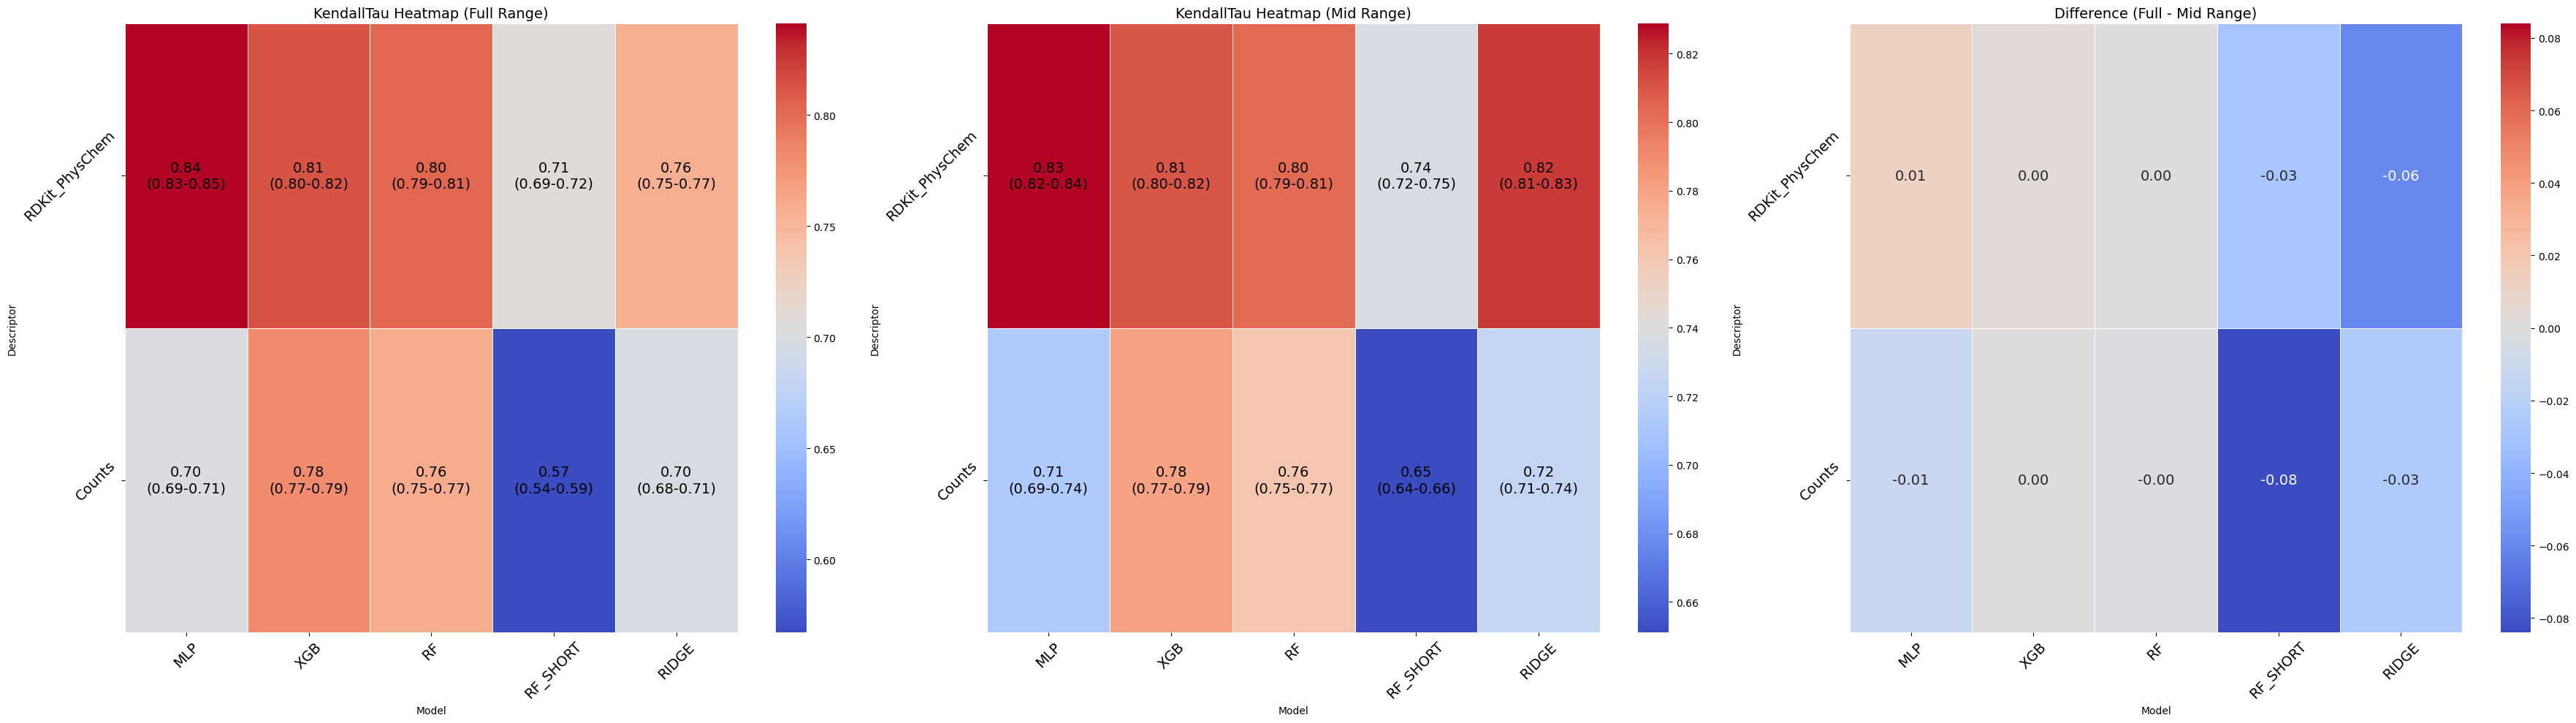

In [5]:
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='KendallTau',descriptor_order=['RDKit_PhysChem', 'Counts'])

/tmp/ipykernel_897279/997277503.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_897279/997277503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


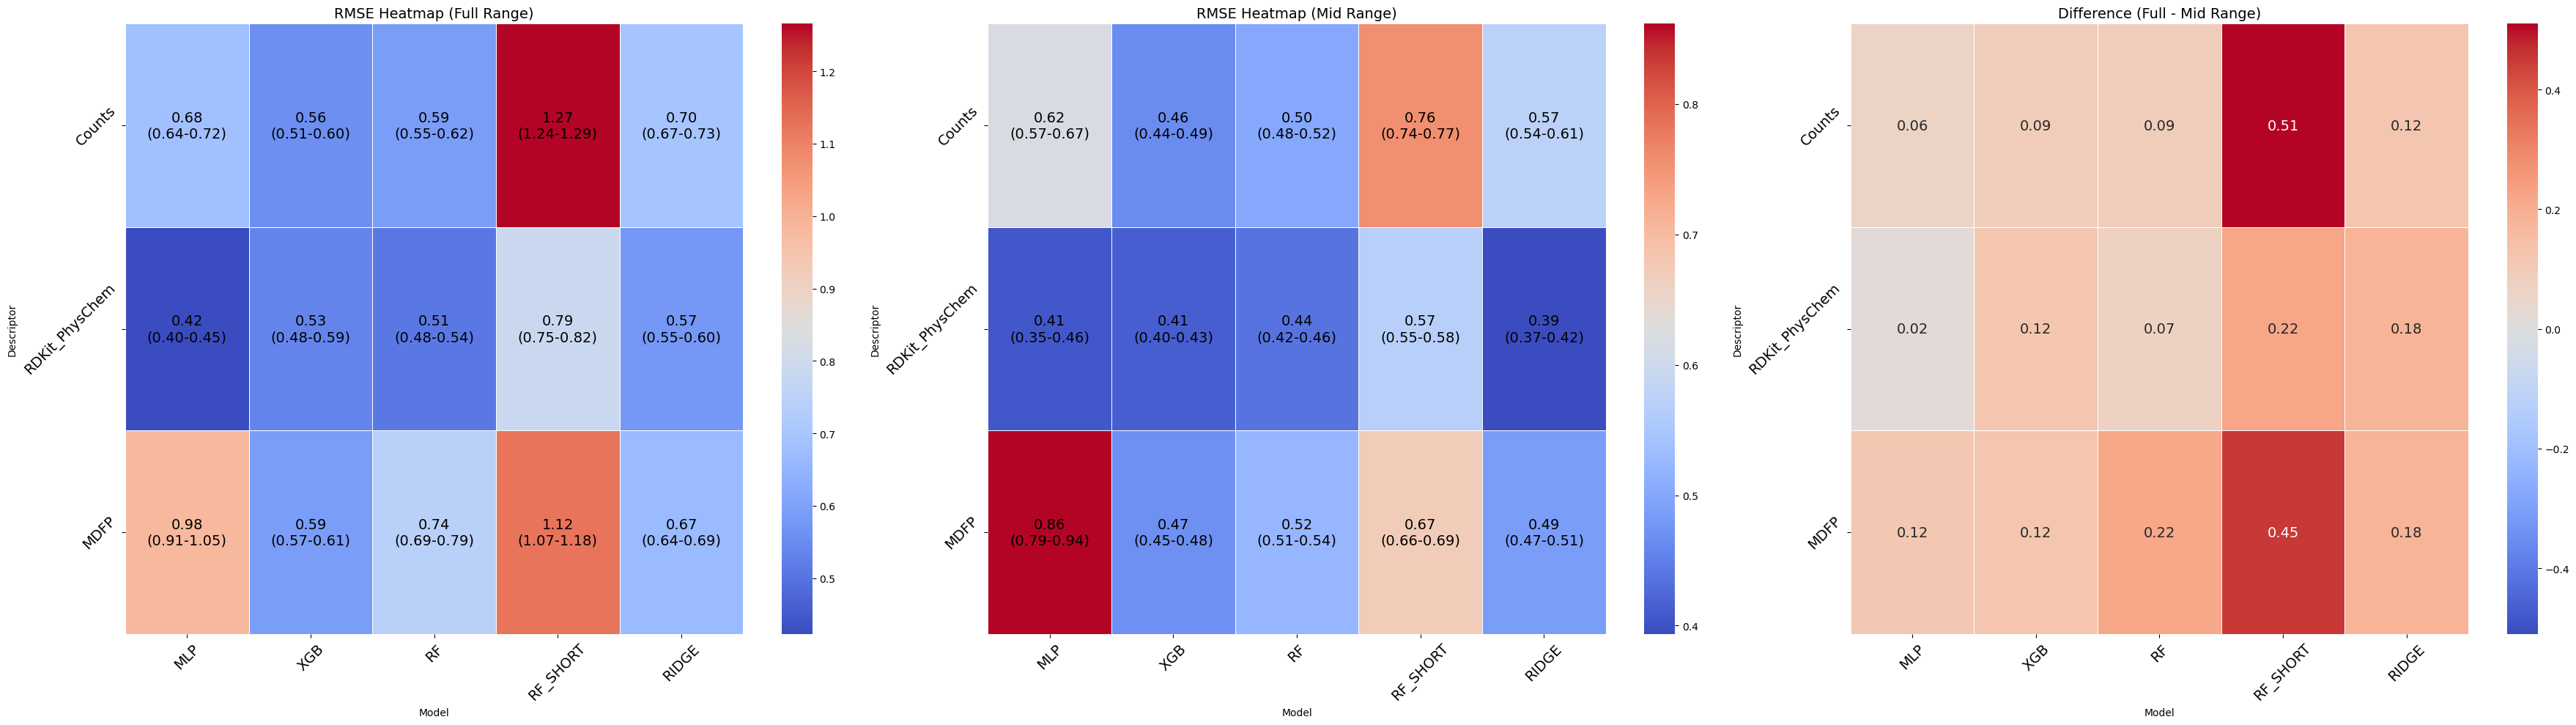

/tmp/ipykernel_897279/997277503.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_897279/997277503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


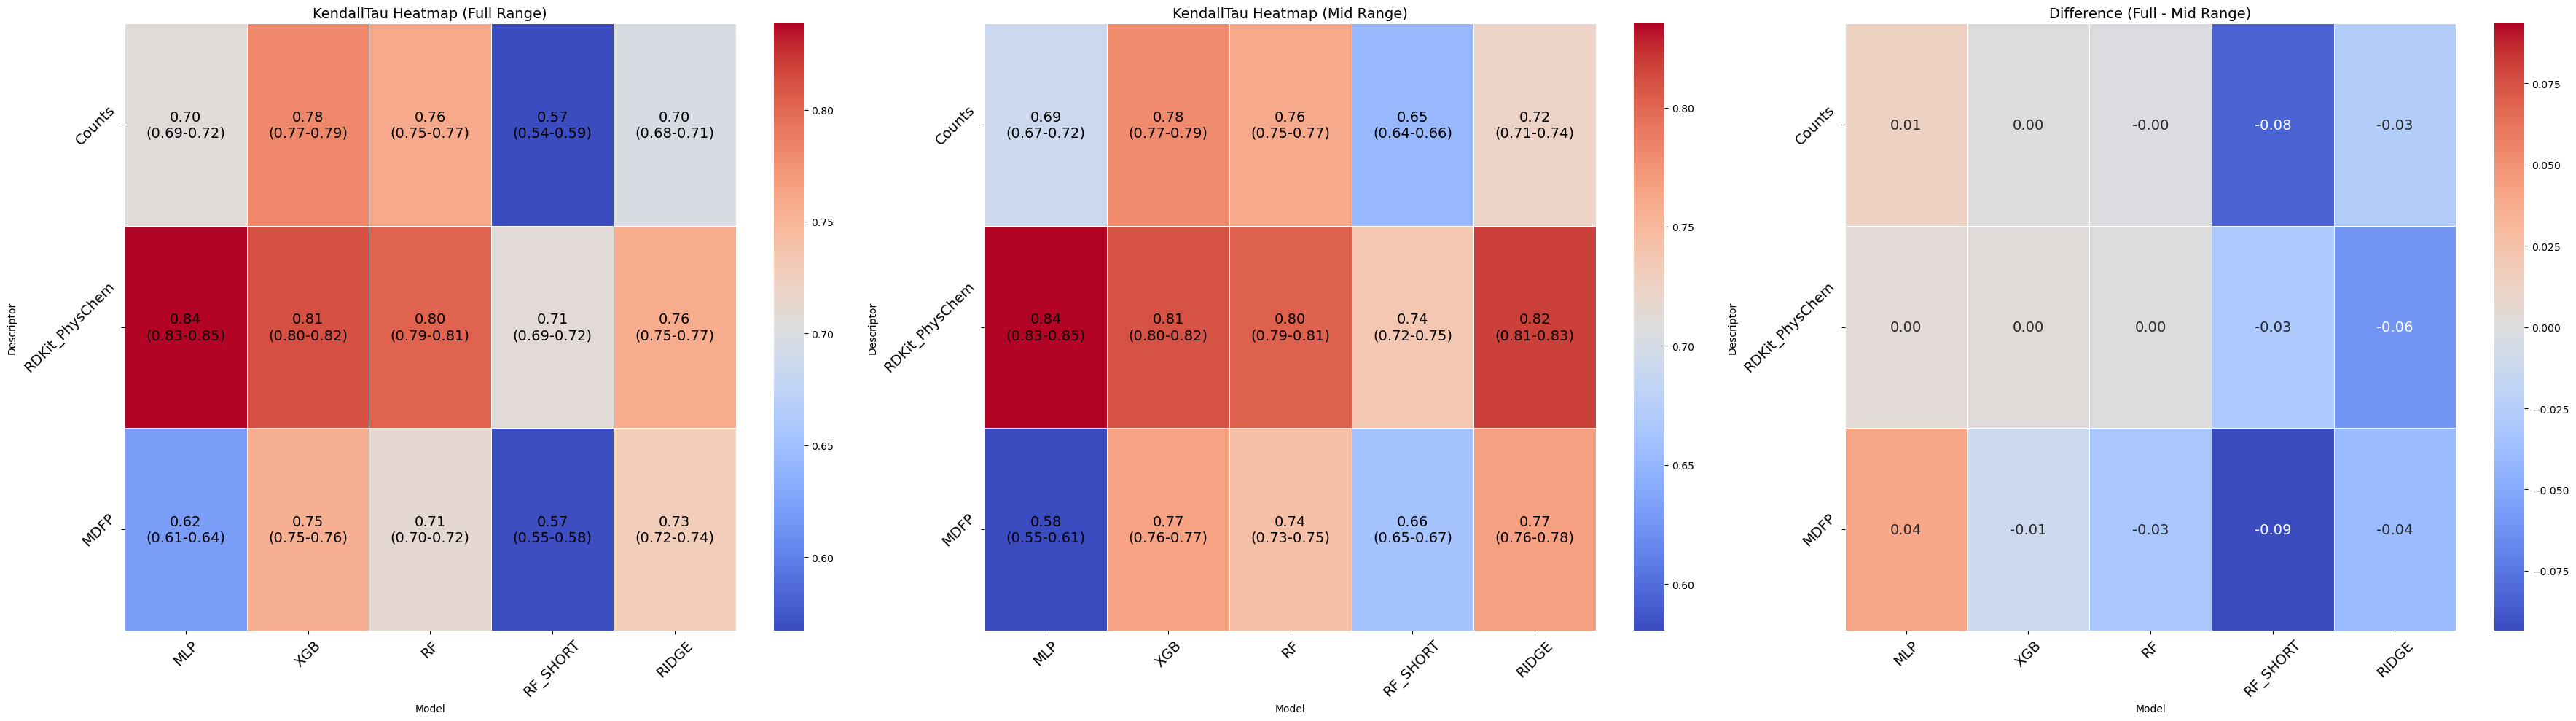

In [6]:
from utils.visualization import compile_metrics_dataframe
data_path = 'results/test_set_mdfp_counts_physchem.pkl'
df_metrics_full_train_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='full_range')
df_metrics_full_mid_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='mid_range')
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='RMSE',descriptor_order=['Counts','RDKit_PhysChem', 'MDFP'],filename='MDFP_check_RMSE')
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='KendallTau',descriptor_order=['Counts','RDKit_PhysChem', 'MDFP'],filename='MDFP_check_Kendalltau')

from utils.visualization import compile_metrics_dataframe
data_path = 'results/test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
df_metrics_full_train_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='full_range')
df_metrics_full_mid_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='mid_range')

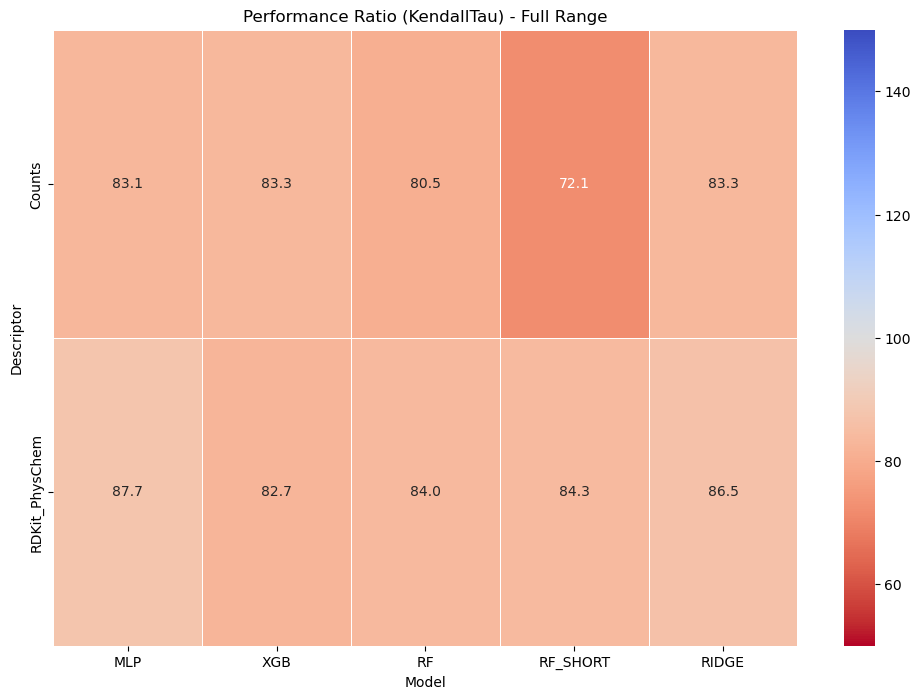

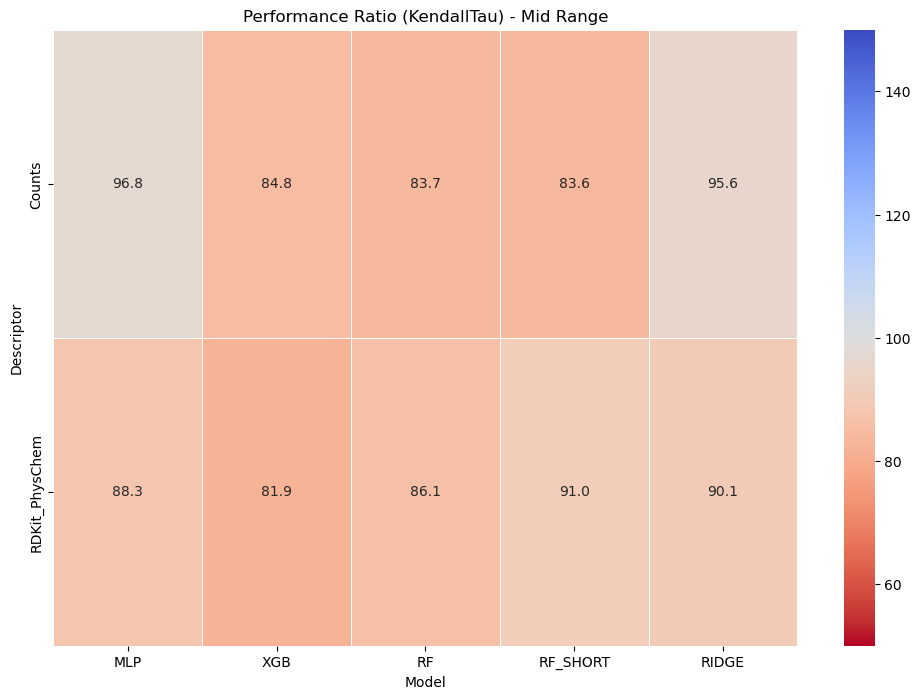

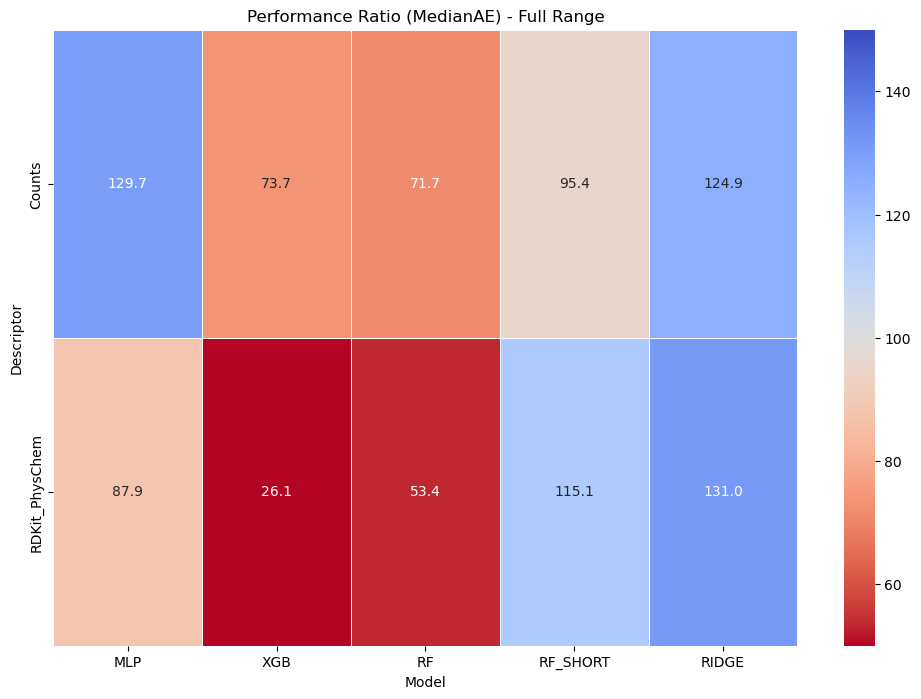

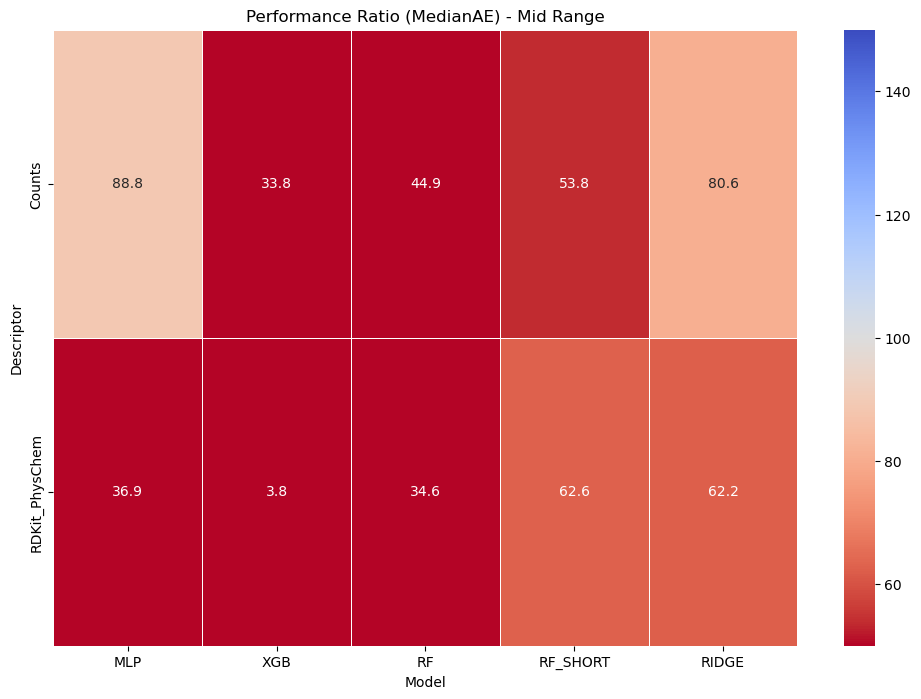

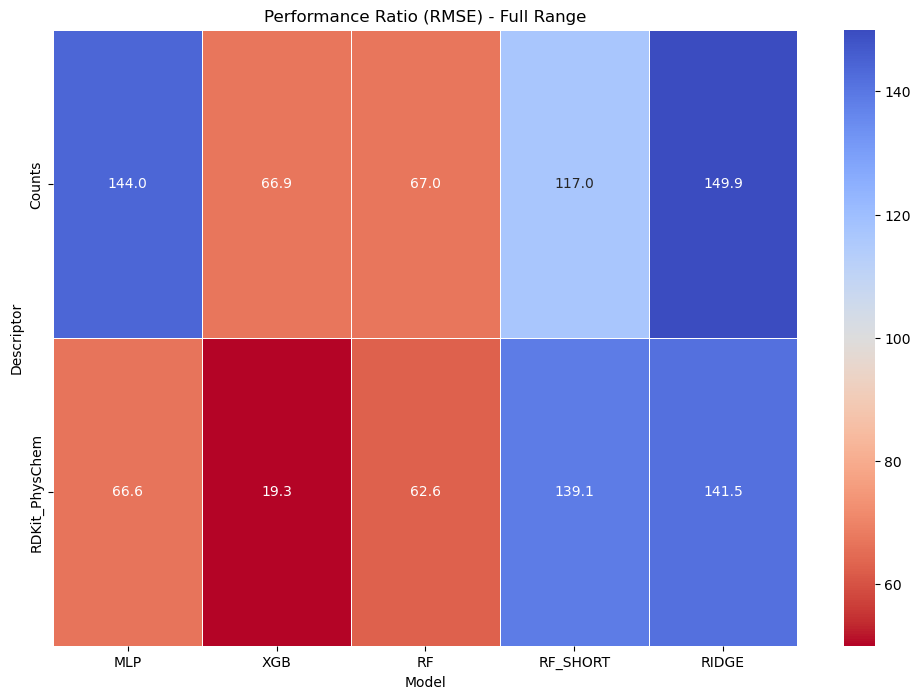

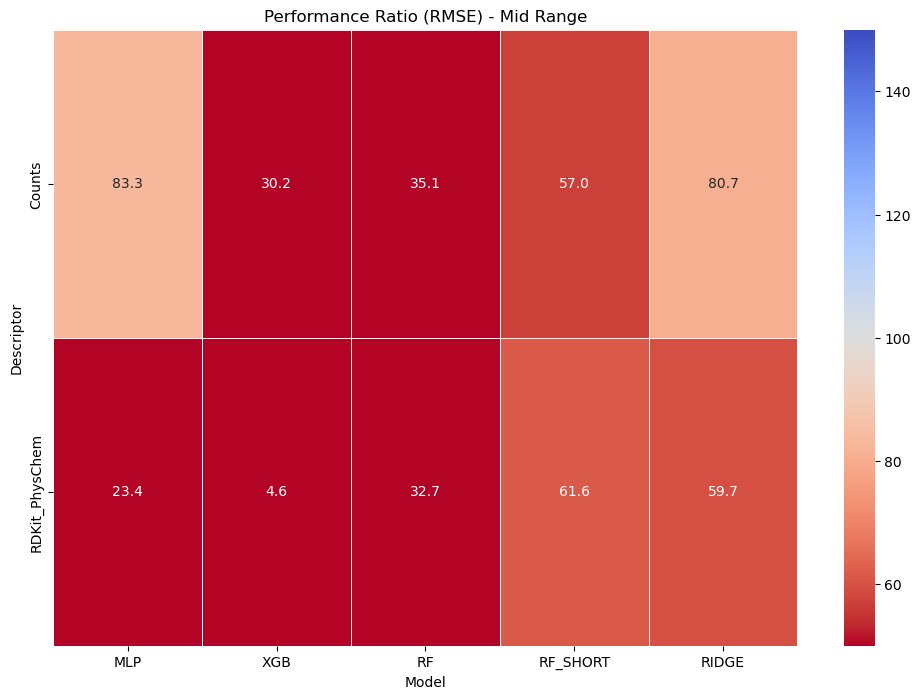

In [6]:
import pandas as pd
import numpy as np
from utils.stats import get_stats
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(train_path_full, train_path_mid, test_path):
    train_data_full = pd.read_pickle(train_path_full)
    train_data_mid = pd.read_pickle(train_path_mid)
    test_data = pd.read_pickle(test_path)
    return train_data_full, train_data_mid, test_data

def calculate_metrics(reals_list, predictions_list, metric_names=['KendallTau', 'RMSE', 'MAE', 'MedianAE']):
    metrics = {metric: [] for metric in metric_names}
    for real, pred in zip(reals_list, predictions_list):
        for metric_name in metric_names:
            metric_vals = [get_stats(r, p, [1])[metric_name] for r, p in zip(real, pred)]
            mean_metric = np.mean(metric_vals)
            metrics[metric_name].append(mean_metric)
    return metrics

def compute_performance_ratio(train_metrics, test_metrics, metric_name):
    # Ensure metric behavior is considered: higher is better for Kendall Tau, lower is better for errors
    if metric_name in ['KendallTau']:  # Higher is better
        return [(test / train) * 100 for train, test in zip(train_metrics[metric_name], test_metrics[metric_name])]
    else:  # Lower is better for RMSE, MAE, MedianAE
        return [(train / test) * 100 for train, test in zip(train_metrics[metric_name], test_metrics[metric_name])]

def plot_heatmap(df, title, vmin=50, vmax=150, cmap='coolwarm_r'):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df, annot=True, cmap=cmap, vmin=vmin, vmax=vmax, fmt=".1f", center=100, linewidths=.5)
    plt.title(title)
    plt.show()

def analyze_overfitting(train_path_full, train_path_mid, test_path, metric_names=['KendallTau', 'RMSE', 'MAE', 'MedianAE']):
    train_data_full, train_data_mid, test_data = load_data(train_path_full, train_path_mid, test_path)

    # Calculate metrics for the training and test sets for both full and mid ranges
    train_metrics_full = calculate_metrics(train_data_full['reals_list'], train_data_full['predictions_train_full_range'], metric_names)
    train_metrics_mid = calculate_metrics(train_data_mid['reals_list'], train_data_mid['predictions_train_mid_range'], metric_names)
    test_metrics = calculate_metrics(test_data['reals_list'], test_data['predictions_train_full_range'], metric_names)

    # Define model and descriptor order
    model_order = ['MLP', 'XGB', 'RF', 'RF_SHORT', 'RIDGE']
    descriptor_order = ['Counts', 'RDKit_PhysChem']  # Update with your actual descriptors if necessary

    # Compute performance ratios for full and mid-range training
    for metric_name in metric_names:
        performance_ratios_full = compute_performance_ratio(train_metrics_full, test_metrics, metric_name)
        performance_ratios_mid = compute_performance_ratio(train_metrics_mid, test_metrics, metric_name)

        # Create DataFrames for each metric
        df_full = pd.DataFrame({
            'Model': [title.split()[0] for title in test_data['combined_titles']],
            'Descriptor': [title.split()[1][1:-1] for title in test_data['combined_titles']],
            'Performance (%)': performance_ratios_full
        })
        df_mid = pd.DataFrame({
            'Model': [title.split()[0] for title in test_data['combined_titles']],
            'Descriptor': [title.split()[1][1:-1] for title in test_data['combined_titles']],
            'Performance (%)': performance_ratios_mid
        })

        # Pivot tables for heatmap plotting
        heatmap_df_full = df_full.pivot(index='Descriptor', columns='Model', values='Performance (%)')
        heatmap_df_mid = df_mid.pivot(index='Descriptor', columns='Model', values='Performance (%)')

        # Ensure model and descriptor ordering
        heatmap_df_full = heatmap_df_full[model_order]
        heatmap_df_mid = heatmap_df_mid[model_order]
        heatmap_df_full = heatmap_df_full.reindex(descriptor_order)
        heatmap_df_mid = heatmap_df_mid.reindex(descriptor_order)

        # Plot heatmaps for each metric
        plot_heatmap(heatmap_df_full, title=f'Performance Ratio ({metric_name}) - Full Range')
        plot_heatmap(heatmap_df_mid, title=f'Performance Ratio ({metric_name}) - Mid Range')

# Example usage
analyze_overfitting(
    train_path_full='results/train_set_full_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl',
    train_path_mid='results/train_set_mid_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl',
    test_path='results/test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl',
    metric_names=['KendallTau', 'MedianAE',"RMSE"]
)


In [ ]:

data_path = 'results/test_set_results_physchem.pkl'

metric_names=['KendallTau', 'MedianAE',"RMSE"]
train_data_full, train_data_mid, test_data = load_data(train_path_full, train_path_mid, test_path)

# Calculate metrics for the training and test sets for both full and mid ranges
train_metrics_full = calculate_metrics(train_data_full['reals_list'], train_data_full['predictions_train_full_range'], metric_names)
train_metrics_mid = calculate_metrics(train_data_mid['reals_list'], train_data_mid['predictions_train_mid_range'], metric_names)
test_metrics = calculate_metrics(test_data['reals_list'], test_data['predictions_train_full_range'], metric_names)
test_metrics

{'KendallTau': [0.7013675198454608,
  0.781348482500554,
  0.7592819859541038,
  0.5671941857026085,
  0.6981650292673558,
  0.8410440304250919,
  0.8122937929125223,
  0.8033217376519746,
  0.7074238995289661,
  0.7572023281924747],
 'MedianAE': [0.34456249492137625,
  0.2230923282618181,
  0.21899199753525997,
  0.8891503745136783,
  0.3632525999790229,
  0.15273194950128263,
  0.18449708088442196,
  0.21296632802639381,
  0.5046000606406554,
  0.28060022737323215],
 'RMSE': [0.6916539804896304,
  0.5550113269312129,
  0.5880702879576906,
  1.2656849221416464,
  0.6960219365621428,
  0.4403466122516204,
  0.5343535086384016,
  0.5086761844359412,
  0.7871914146508037,
  0.574951613707063]}

In [10]:
import plotly.express as px
import pandas as pd

def compute_overfitting_ratio(train_metrics, test_metrics, metric_name):
    """
    Compute the ratio of test performance to train performance for mid-range data.
    Higher is better for Kendall Tau, lower is better for errors.
    """
    if metric_name in ['KendallTau']:  # Higher is better
        return [(test / train) * 100 for train, test in zip(train_metrics[metric_name], test_metrics[metric_name])]
    else:  # Lower is better for RMSE, MAE, MedianAE
        return [(train / test) * 100 for train, test in zip(train_metrics[metric_name], test_metrics[metric_name])]

def analyze_overfitting_vs_performance_diff(
    train_metrics_mid, test_metrics_mid, train_metrics_full, test_metrics_full,
    metric_name='KendallTau', model_order=None, descriptor_order=None
):
    # Compute overfitting ratio (train mid vs test mid)
    overfitting_mid = compute_overfitting_ratio(train_metrics_mid, test_metrics_mid, metric_name)

    # Calculate performance difference (mid vs full) as a percentage
    performance_diff_mid_full = [
        ((mid - full) / full) * 100
        for mid, full in zip(test_metrics_mid[metric_name], test_metrics_full[metric_name])
    ]

    # Flatten model and descriptor combinations
    models = [model for model in model_order for _ in descriptor_order]
    descriptors = descriptor_order * len(model_order)

    # Combine into a DataFrame
    df = pd.DataFrame({
        'Model': models,
        'Descriptor': descriptors,
        'Overfitting (%)': overfitting_mid,
        'Performance Difference (%)': performance_diff_mid_full
    })

    # Ensure the DataFrame creation works without length mismatch
    if len(models) != len(overfitting_mid) or len(descriptors) != len(performance_diff_mid_full):
        raise ValueError("Lengths of models, descriptors, or metric lists do not match!")

    # Create an interactive scatter plot
    fig = px.scatter(
        df,
        x='Overfitting (%)',
        y='Performance Difference (%)',
        color='Model',
        symbol='Descriptor',
        hover_data=['Model', 'Descriptor'],
        title=f"Overfitting vs Performance Difference ({metric_name})",
        labels={
            'Overfitting (%)': 'Degree of Overfitting (Train Mid vs Test Mid)',
            'Performance Difference (%)': 'Performance Difference (Mid vs Full)'
        }
    )
    fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
    fig.show()



# Example usage

# Paths to data
train_path_full = 'results/train_set_full_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
train_path_mid = 'results/train_set_mid_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
test_path = 'results/test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'

# Metric names to analyze
metric_name = 'RMSE'

# Load data
train_data_full, train_data_mid, test_data = load_data(train_path_full, train_path_mid, test_path)

# Calculate metrics
train_metrics_full = calculate_metrics(
    train_data_full['reals_list'],
    train_data_full['predictions_train_full_range'],
    metric_names=[metric_name]
)
train_metrics_mid = calculate_metrics(
    train_data_mid['reals_list'],
    train_data_mid['predictions_train_mid_range'],
    metric_names=[metric_name]
)
test_metrics_mid = calculate_metrics(
    test_data['reals_list'],
    test_data['predictions_train_mid_range'],
    metric_names=[metric_name]
)
test_metrics_full = calculate_metrics(
    test_data['reals_list'],
    test_data['predictions_train_full_range'],
    metric_names=[metric_name]
)

# Define model and descriptor orders
model_order = ['MLP', 'XGB', 'RF', 'RF_SHORT', 'RIDGE']
descriptor_order = ['Counts', 'RDKit_PhysChem']

# Call the analysis function
analyze_overfitting_vs_performance_diff(
    train_metrics_mid=train_metrics_mid,
    test_metrics_mid=test_metrics_mid,
    train_metrics_full=train_metrics_full,
    test_metrics_full=test_metrics_full,
    metric_name=metric_name,
    model_order=model_order,
    descriptor_order=descriptor_order
)


In [11]:
# Debugging overfitting calculation
def compute_overfitting_ratio_debug(train_metrics, test_metrics, metric_name):
    ratios = []
    for train, test in zip(train_metrics[metric_name], test_metrics[metric_name]):
        if metric_name in ['KendallTau']:  # Higher is better
            ratio = (test / train) * 100
        else:  # Lower is better for RMSE, MAE
            ratio = (train / test) * 100
        ratios.append(ratio)
        print(f"Train: {train}, Test: {test}, Overfitting Ratio: {ratio:.2f}")
    return ratios

# Use this in the analysis function
overfitting_mid = compute_overfitting_ratio_debug(train_metrics_mid, test_metrics_mid, metric_name)

# Manually verify heatmap values against scatter plot
print("Heatmap (Mid Range) Values:")
print(train_metrics_mid[metric_name])
print("Scatter Plot Overfitting Ratios:")
print(overfitting_mid)


Train: 0.5760755413084184, Test: 0.5941599162528646, Overfitting Ratio: 96.96
Train: 0.167647522221855, Test: 0.463531255646738, Overfitting Ratio: 36.17
Train: 0.20657976760762584, Test: 0.500154339125799, Overfitting Ratio: 41.30
Train: 0.7215289462180897, Test: 0.7558661806638887, Overfitting Ratio: 95.46
Train: 0.5613837367803663, Test: 0.5727639676990612, Overfitting Ratio: 98.01
Train: 0.10316072710073135, Test: 0.4233389418864135, Overfitting Ratio: 24.37
Train: 0.02474893155452755, Test: 0.41308863589715655, Overfitting Ratio: 5.99
Train: 0.16631887197974132, Test: 0.435652869707061, Overfitting Ratio: 38.18
Train: 0.48495581065463284, Test: 0.5679211012319383, Overfitting Ratio: 85.39
Train: 0.3435327783171586, Test: 0.3935476008344133, Overfitting Ratio: 87.29
Heatmap (Mid Range) Values:
[0.5760755413084184, 0.167647522221855, 0.20657976760762584, 0.7215289462180897, 0.5613837367803663, 0.10316072710073135, 0.02474893155452755, 0.16631887197974132, 0.48495581065463284, 0.3435

In [8]:
train_path_full = 'results/train_set_full_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
train_path_mid = 'results/train_set_mid_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
test_path = 'results/test_set_overfitting_check_different_train_ranges_Counts_NeuralNetworkModelGregstyle.pkl'
train_data_full, train_data_mid, test_data = load_data(train_path_full, train_path_mid, test_path)
data_train_mid = pd.read_pickle(train_path_mid)
model_names =data_train_mid['combined_titles']
metric_names=[ 'MedianAE']
train_metrics_mid = calculate_metrics(train_data_mid['reals_list'], train_data_mid['predictions_train_mid_range'], metric_names)
train_metrics_mid
df = pd.DataFrame(train_metrics_mid)
df['Model'] = model_names
df

,MedianAE,Model
0,0.305881,MLP (Counts)
1,0.075431,XGB (Counts)
2,0.098336,RF (Counts)
3,0.478507,RF_SHORT (Counts)
4,0.292737,RIDGE (Counts)
5,0.056335,MLP (RDKit_PhysChem)
6,0.006939,XGB (RDKit_PhysChem)
7,0.073610,RF (RDKit_PhysChem)
8,0.315854,RF_SHORT (RDKit_PhysChem)
9,0.174396,RIDGE (RDKit_PhysChem)


In [11]:
df.sort_values(by='MedianAE',ascending=True)

,MedianAE,Model
6,0.006939,XGB (RDKit_PhysChem)
5,0.056335,MLP (RDKit_PhysChem)
7,0.073610,RF (RDKit_PhysChem)
1,0.075431,XGB (Counts)
2,0.098336,RF (Counts)
9,0.174396,RIDGE (RDKit_PhysChem)
4,0.292737,RIDGE (Counts)
0,0.305881,MLP (Counts)
8,0.315854,RF_SHORT (RDKit_PhysChem)
3,0.478507,RF_SHORT (Counts)


In [12]:
test_metrics_mid = calculate_metrics(test_data['reals_list'], test_data['predictions_train_mid_range'], metric_names)
df_test = pd.DataFrame(test_metrics_mid)
df_test['Model'] = model_names
df_test.sort_values(by='MedianAE',ascending=True)

,MedianAE,Model
5,0.150674,MLP (RDKit_PhysChem)
6,0.170426,XGB (RDKit_PhysChem)
9,0.192251,RIDGE (RDKit_PhysChem)
7,0.200052,RF (RDKit_PhysChem)
1,0.206631,XGB (Counts)
2,0.211897,RF (Counts)
4,0.299527,RIDGE (Counts)
0,0.320357,MLP (Counts)
8,0.358384,RF_SHORT (RDKit_PhysChem)
3,0.495871,RF_SHORT (Counts)


In [13]:
#combine on model, suffix train and test
df_combined = pd.merge(df,df_test,on='Model',suffixes=('_train', '_test'))
df_combined['MedianAE_diff'] = df_combined['MedianAE_train'] - df_combined['MedianAE_test']
df_combined.sort_values(by='MedianAE_diff',ascending=True)
#also error on test as percentage of error on train
df_combined['MedianAE_diff_percentage'] = df_combined['MedianAE_diff']/df_combined['MedianAE_train']*100
df_combined.sort_values(by='MedianAE_diff_percentage',ascending=True)
#and as fold change
df_combined['MedianAE_diff_fold_change'] = df_combined['MedianAE_test']/df_combined['MedianAE_train']
df_combined.sort_values(by='MedianAE_diff_fold_change',ascending=False)


,MedianAE_train,Model,MedianAE_test,MedianAE_diff,MedianAE_diff_percentage,MedianAE_diff_fold_change
6,0.006939,XGB (RDKit_PhysChem),0.170426,-0.163487,-2356.210573,24.562106
1,0.075431,XGB (Counts),0.206631,-0.131200,-173.933868,2.739339
7,0.073610,RF (RDKit_PhysChem),0.200052,-0.126443,-171.774772,2.717748
5,0.056335,MLP (RDKit_PhysChem),0.150674,-0.094340,-167.462158,2.674622
2,0.098336,RF (Counts),0.211897,-0.113561,-115.482489,2.154825
8,0.315854,RF_SHORT (RDKit_PhysChem),0.358384,-0.042530,-13.465099,1.134651
9,0.174396,RIDGE (RDKit_PhysChem),0.192251,-0.017855,-10.238235,1.102382
0,0.305881,MLP (Counts),0.320357,-0.014476,-4.732564,1.047326
3,0.478507,RF_SHORT (Counts),0.495871,-0.017364,-3.628809,1.036288
4,0.292737,RIDGE (Counts),0.299527,-0.006790,-2.319599,1.023196


In [14]:
#some thing for train full range
train_data_full = pd.read_pickle(train_path_full)
model_names =train_data_full['combined_titles']
metric_names=[ 'MedianAE']
train_metrics_full = calculate_metrics(train_data_full['reals_list'], train_data_full['predictions_train_full_range'], metric_names)
df_train_full = pd.DataFrame(train_metrics_full)
df_train_full['Model'] = model_names
df_train_full.sort_values(by='MedianAE',ascending=True)
df_combined_full = pd.merge(df_train_full,df_test,on='Model',suffixes=('_train_full', '_test'))
df_combined_full
df_combined_full['MedianAE_diff'] = df_combined_full['MedianAE_train_full'] - df_combined_full['MedianAE_test']
df_combined_full.sort_values(by='MedianAE_diff',ascending=True)
df_combined_full['MedianAE_diff_percentage'] = df_combined_full['MedianAE_diff']/df_combined_full['MedianAE_train_full']*100
df_combined_full.sort_values(by='MedianAE_diff_percentage',ascending=True)
df_combined_full['MedianAE_diff_fold_change'] = df_combined_full['MedianAE_test']/df_combined_full['MedianAE_train_full']
df_combined_full.sort_values(by='MedianAE_diff_fold_change',ascending=False)


,MedianAE_train_full,Model,MedianAE_test,MedianAE_diff,MedianAE_diff_percentage,MedianAE_diff_fold_change
6,0.048196,XGB (RDKit_PhysChem),0.170426,-0.122229,-253.608058,3.536081
7,0.113738,RF (RDKit_PhysChem),0.200052,-0.086314,-75.888582,1.758886
2,0.156934,RF (Counts),0.211897,-0.054963,-35.023031,1.350230
1,0.164363,XGB (Counts),0.206631,-0.042267,-25.715793,1.257158
5,0.134316,MLP (RDKit_PhysChem),0.150674,-0.016358,-12.178971,1.121790
0,0.446909,MLP (Counts),0.320357,0.126552,28.317265,0.716827
4,0.453666,RIDGE (Counts),0.299527,0.154138,33.976193,0.660238
8,0.580739,RF_SHORT (RDKit_PhysChem),0.358384,0.222356,38.288369,0.617116
3,0.847850,RF_SHORT (Counts),0.495871,0.351979,41.514317,0.584857
9,0.367628,RIDGE (RDKit_PhysChem),0.192251,0.175377,47.704978,0.522950
